In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.optimizers import Adam, RMSprop
from util.plots import plot_history
from nets.cnn_net.cnn_net import cnn_net
from glob import glob
import util.image_import as ii
import os
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [3]:
train_path = '../dataset2/res_still/train'
valid_path = '../dataset2/res_still/valid'
test_path = '../dataset2/res_still/test'

batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        vertical_flip=True,
        horizontal_flip=True,
        brightness_range=(0.65, 1.35))

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=80,
        classes=['potato', 'catfood', 'table'])

Found 573 images belonging to 3 classes.
Found 160 images belonging to 3 classes.
Found 80 images belonging to 3 classes.


In [2]:
# Importing the images
train_pot = glob(os.path.join("../dataset2/res_still/train/potato", "*.jpg"))
train_cat = glob(os.path.join("../dataset2/res_still/train/catfood", "*.jpg"))
train_tab = glob(os.path.join("../dataset2/res_still/train/table", "*.jpg"))
val_pot   = glob(os.path.join("../dataset2/res_still/valid/potato", "*.jpg"))
val_cat   = glob(os.path.join("../dataset2/res_still/valid/catfood", "*.jpg"))
val_tab   = glob(os.path.join("../dataset2/res_still/valid/table", "*.jpg"))
test_pot  = glob(os.path.join("../dataset2/res_still/test/potato", "*.jpg"))
test_cat  = glob(os.path.join("../dataset2/res_still/test/catfood", "*.jpg"))
test_tab  = glob(os.path.join("../dataset2/res_still/test/table", "*.jpg"))

X_train, y_train = ii.images_to_numpy(train_pot, train_cat, train_tab)
X_val, y_val = ii.images_to_numpy(val_pot, val_cat, val_tab)
X_test, y_test = ii.images_to_numpy(test_pot, test_cat, test_tab)

batch_size = 32
num_classes = 3

# Making datagen for training with normilization, center, and dataugmentation
train_datagen = ImageDataGenerator(
        featurewise_center=True,
        #featurewise_std_normalization=True
        rescale=1./255,
        rotation_range=10,
        vertical_flip=True,
        horizontal_flip=True,
        brightness_range=(0.65, 1.35)
)

# Making datagen for validation and test with normilization
valid_datagen = ImageDataGenerator(
        featurewise_center=True, 
        #featurewise_std_normalization=True
        rescale=1./255
)


X_train = X_train.astype(float)
X_val = X_val.astype(float)
X_test = X_test.astype(float)

y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

# Required for featurewise normalization
train_datagen.fit(X_train/255.)
valid_datagen.fit(X_train/255.)

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=batch_size, shuffle=True)

validation_generator = valid_datagen.flow(X_val,
                                     y_val,
                                     batch_size=batch_size, shuffle=True)

test_generator = valid_datagen.flow(X_test,
                                     y_test,
                                     batch_size=80, shuffle=True)

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  #  3D activation map -> 1D vector
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5)) 
model.add(Dense(3))                                 # Conv2D prøve (5,5) i stedet for (3,3)
model.add(Activation('softmax'))                    # MaxPooling2D prøv (4,4) i stedet for (2,2)
                                                    # lr = [1e-2, 1e-3, 1e-4]
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, epsilon=10e-8),
              metrics=['accuracy'])

In [4]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=573 // batch_size,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=160 // batch_size)

Epoch 1/100
17/17 [==============================] - 6s 368ms/step - loss: 1.0683 - acc: 0.4789 - val_loss: 0.8383 - val_acc: 0.6250
Epoch 2/100
17/17 [==============================] - 6s 357ms/step - loss: 0.7173 - acc: 0.6900 - val_loss: 0.5402 - val_acc: 0.9187
Epoch 3/100
17/17 [==============================] - 6s 326ms/step - loss: 0.4484 - acc: 0.8207 - val_loss: 0.3458 - val_acc: 0.8313
Epoch 4/100
17/17 [==============================] - 5s 310ms/step - loss: 0.3778 - acc: 0.8441 - val_loss: 0.2105 - val_acc: 0.9437
Epoch 5/100
17/17 [==============================] - 5s 318ms/step - loss: 0.2691 - acc: 0.8970 - val_loss: 0.2060 - val_acc: 0.9812
Epoch 6/100
17/17 [==============================] - 5s 319ms/step - loss: 0.2700 - acc: 0.8968 - val_loss: 0.1321 - val_acc: 0.9812
Epoch 7/100
17/17 [==============================] - 6s 346ms/step - loss: 0.2540 - acc: 0.9044 - val_loss: 0.1563 - val_acc: 0.9750
Epoch 8/100
17/17 [==============================] - 16s 962ms/step -

17/17 [==============================] - 7s 401ms/step - loss: 0.0331 - acc: 0.9908 - val_loss: 0.0169 - val_acc: 0.9938
Epoch 63/100
17/17 [==============================] - 7s 419ms/step - loss: 0.0391 - acc: 0.9796 - val_loss: 0.0219 - val_acc: 0.9938
Epoch 64/100
17/17 [==============================] - 7s 407ms/step - loss: 0.0327 - acc: 0.9798 - val_loss: 0.0294 - val_acc: 0.9938
Epoch 65/100
17/17 [==============================] - 7s 415ms/step - loss: 0.0294 - acc: 0.9871 - val_loss: 0.0223 - val_acc: 0.9938
Epoch 66/100
17/17 [==============================] - 7s 400ms/step - loss: 0.0425 - acc: 0.9796 - val_loss: 0.0197 - val_acc: 0.9938
Epoch 67/100
17/17 [==============================] - 7s 398ms/step - loss: 0.0536 - acc: 0.9853 - val_loss: 0.0244 - val_acc: 0.9875
Epoch 68/100
17/17 [==============================] - 7s 413ms/step - loss: 0.0666 - acc: 0.9761 - val_loss: 0.0355 - val_acc: 0.9938
Epoch 69/100
17/17 [==============================] - 7s 423ms/step - loss:

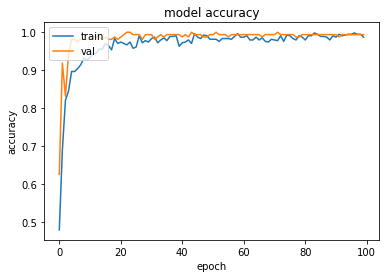

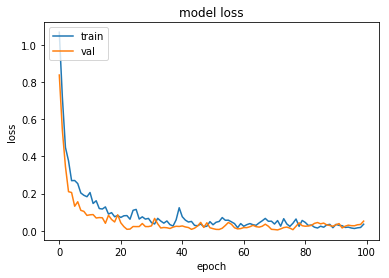

In [6]:
plot_history(history, save=True, path='nets/cnn_net/', name='cnn_full')

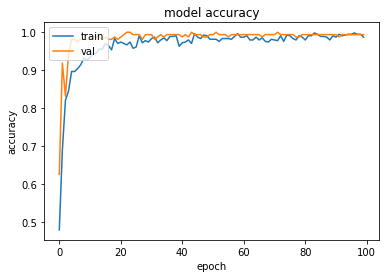

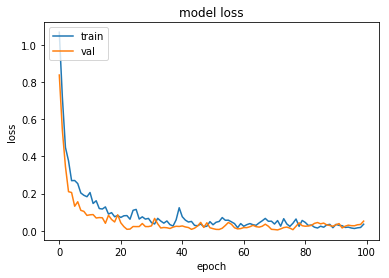

In [7]:
plot_history(history)

In [8]:
imgs, labels = next(test_generator)

model.evaluate(imgs,labels, batch_size=80)

80/80 [==============================] - 1s 7ms/step


[0.17603328824043274, 0.987500011920929]

In [9]:
# serialize model to JSON
model_json = model.to_json()
with open("nets/cnn_net/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("nets/cnn_net/model.h5")

In [9]:
# load json and create model
#json_file = open('model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)
# load weights into new model
#loaded_model.load_weights("model.h5")
#print("Loaded model from disk")
 
# evaluate loaded model on test data
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#score = loaded_model.evaluate(X, Y, verbose=0)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0         
__________